# **Digital Signal and Image Management - Assignment 3**<br/>
**Master's Degree in Data Science (A.Y. 2021/2022)**<br/>
**University of Milano - Bicocca**<br/>

Nabil  EL Asri



implement a script for image stitching of two images, following the guidelines shown during the laboratory.

In [ ]:
!pip install opencv_contrib_python==3.4.2.17 --force-reinstall

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

# Verify OpenCV version
print(cv.__version__)

3.4.2


In [2]:
# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

# 1. Let's start by testing with the same images used in class.


In [3]:
# Importing images
im1 = cv.imread('images/boat1.jpg', 0)
im2 = cv.imread('images/boat3.jpg', 0)

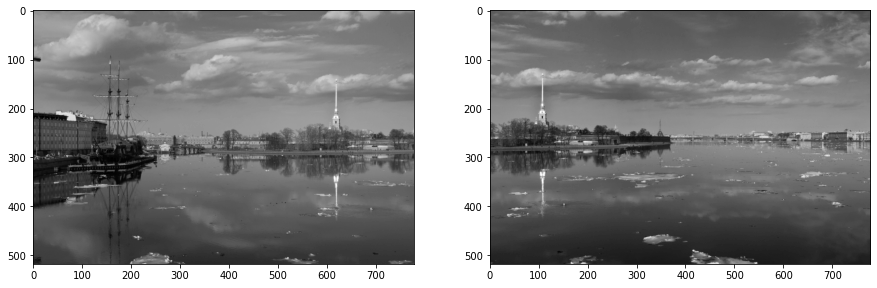

In [4]:
# Visualization
plt.subplot(1,2,1); plt.imshow(im1, cmap='gray'); 
plt.subplot(1,2,2); plt.imshow(im2, cmap='gray'); 

We initialize the SIFT algorithm for identifying and describing keypoints within the two images.

In [5]:
sift = cv.xfeatures2d.SIFT_create()
(kps1, features1) = sift.detectAndCompute(im1, None)
(kps2, features2) = sift.detectAndCompute(im2, None)

Once we have identified our keypoints we match the keypoints of the first image with those of the second image. 
The matching procedure is of the cross-check type to minimize the number of false positives.

In [6]:
bf = cv.BFMatcher(crossCheck = True)
matches = bf.match(features1, features2)

We represent the best matches identified between the keypoints present in the two photos. 
As you can see the most characteristic elements of the images, first of all the bell tower, are identified as common points between the two images.

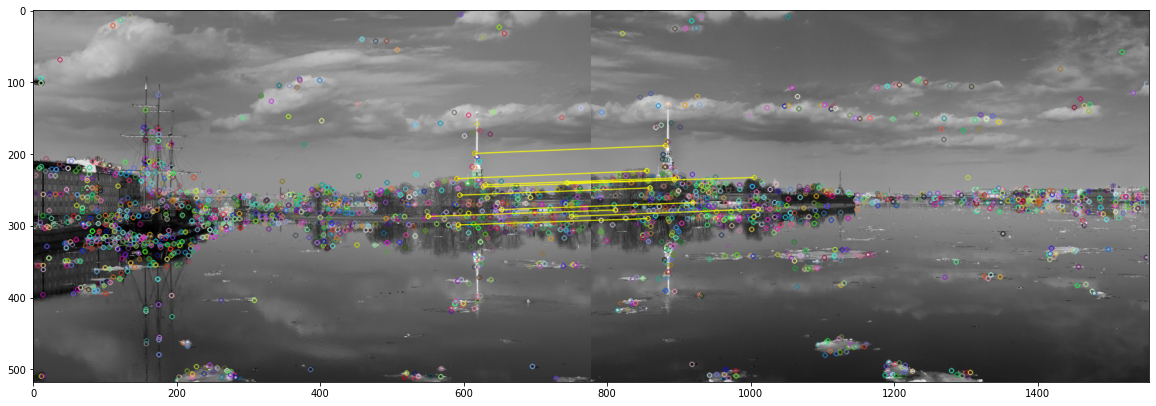

In [7]:
matches = sorted(matches, key = lambda x:x.distance)
res = cv.drawMatches(im1, kps1, im2, kps2, matches[:10], None, matchColor = [255,255,0])
plt.figure(figsize=(20,15))
plt.imshow(res)

In [8]:
# 1193 keypoints identified in image 1
len(kps1)

1193

In [9]:
# 850 keypoints identified in image 2
len(kps2)

850

# 2. Find the homography which describes the transformation from the second set of points to the first one

In [10]:
# 1. Extracting the matching elements; 
# 2. Extracting the indexes corresponding to the Keypoints of the first second figure;
# 3. Extracting the coordinates;
# 4. Homography operation usind cv.findHomography function:
#    - the first element refers to the coordinates of the points in the original plane;
#    - the second element refers to the coordinates of the points in the target plane;
#    - RANSAC-based robust method.

def myHomography(kps1, kps2, matches):
  cook1 = []
  cook2 = []
  
  for el in range(0, len(matches)):
    coo1 = matches[el].queryIdx
    coo2 = matches[el].trainIdx
    cook1.append(kps1[coo1].pt)
    cook2.append(kps2[coo2].pt)

  cook1 = np.asarray(cook1)
  cook2 = np.asarray(cook2)
  
  H, mask = cv.findHomography(cook2, cook1, method=cv.RANSAC)

  return(H)

In [11]:
# The resulting matrix was found
H = myHomography(kps1, kps2, matches)
H

array([[ 5.70149939e-01, -6.14710116e-03,  5.20617643e+02],
       [-1.52895246e-01,  9.21225916e-01,  2.95639256e+01],
       [-5.50931510e-04, -1.40134100e-05,  1.00000000e+00]])

# 3. Apply the homography to the second image

Once the H-matrix has been created, we proceed to remap the points of image 2 into the corresponding points of image 1, using the H-matrix previously obtained.

In [12]:
# We use the cv.warpPerspective function: 
#    - the first element is the image to remap;
#    - the second element is the homography matrix;
#    - width, height indicate the size of the output image.

def myWarp(im, H, width, height):
  homo = cv.warpPerspective(im, H, dsize=(width, height))
  return(homo)

In [13]:
# Apply the previous function
temp = myWarp(im2, H, 1100, 518)

Plot the result of remapping image 2

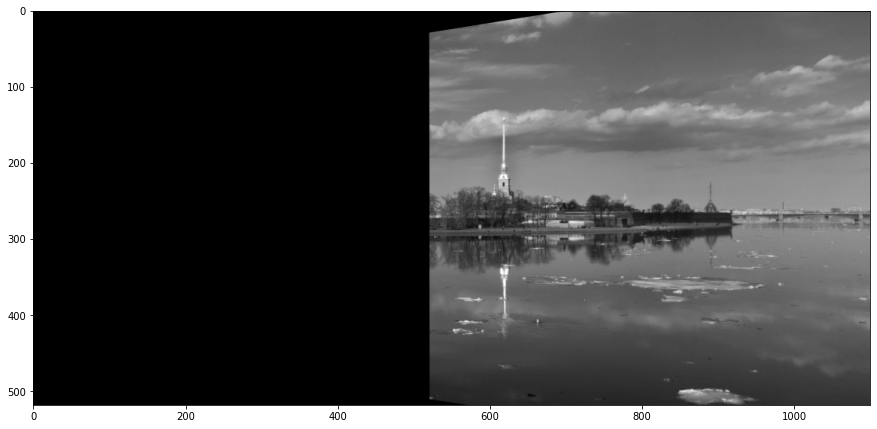

In [14]:
plt.figure(figsize=(15,8))
plt.imshow(temp, cmap='gray')

# 4. Integrate the first image

We then proceed to shrink our remapped image 2, reducing it to just the portion we intend to attach to image 1 to extend it.

In [15]:
# This function requires two simple steps:
#    - first, we must cut the previously remapped image so that it coincides perfectly with the first image;
#    - and as second thing we have to concatenate the two images.

# im_base = the first image
# im_new = the second rimapped image



def myCollage(im_base, im_new):

  cut = im_new[0:im_base.shape[0], im_base.shape[1]:]

  # plt.figure(figsize=(15,8))
  # plt.imshow(cut, cmap = 'gray')
  # If you want you can show the cropped image inside the function.
  
  scenic = np.concatenate((im_base, cut), axis=1)
  return(scenic)



In [16]:
# Apply the previous function
final = myCollage(im1, temp)

We conclude by plotting the result.

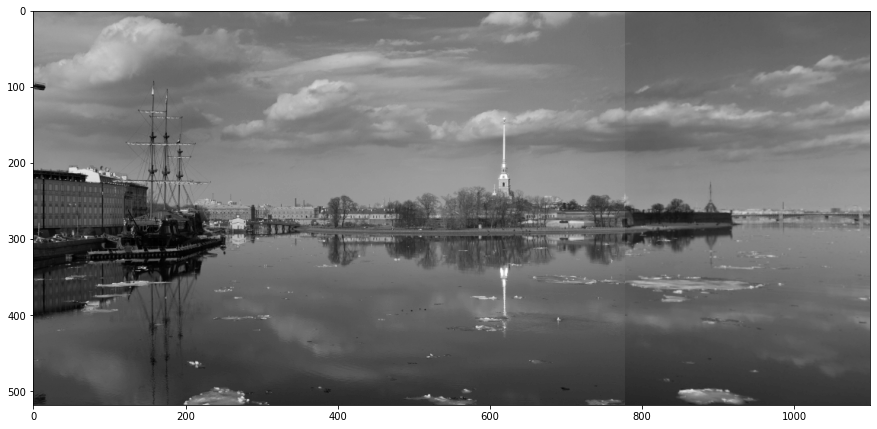

In [17]:
plt.figure(figsize=(15,8))
plt.imshow(final, cmap='gray')

# 5. Apply the functions implemented above to a new pair of images

In [18]:
# importing images
prova1 = cv.imread('images/prova1.jpg', 0)
prova2 = cv.imread('images/prova2.jpg', 0)

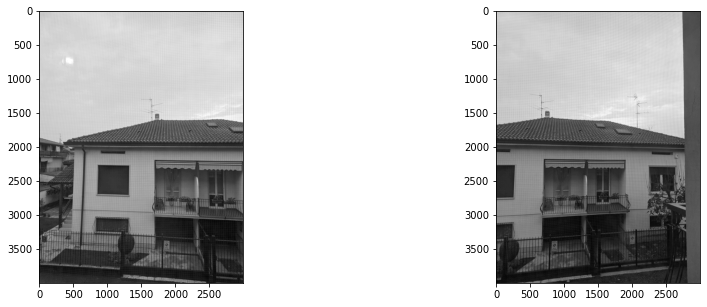

In [19]:
# Visualization
plt.subplot(1,2,1); plt.imshow(prova1, cmap='gray'); 
plt.subplot(1,2,2); plt.imshow(prova2, cmap='gray'); 

In [20]:
# SIFT algorithm
sift = cv.xfeatures2d.SIFT_create()
(kps1, features1) = sift.detectAndCompute(prova1, None)
(kps2, features2) = sift.detectAndCompute(prova2, None)

In [21]:
# Match the key points in the first image with those in the second image
# Cross-check type
bf = cv.BFMatcher(crossCheck = True)
matches = bf.match(features1, features2)

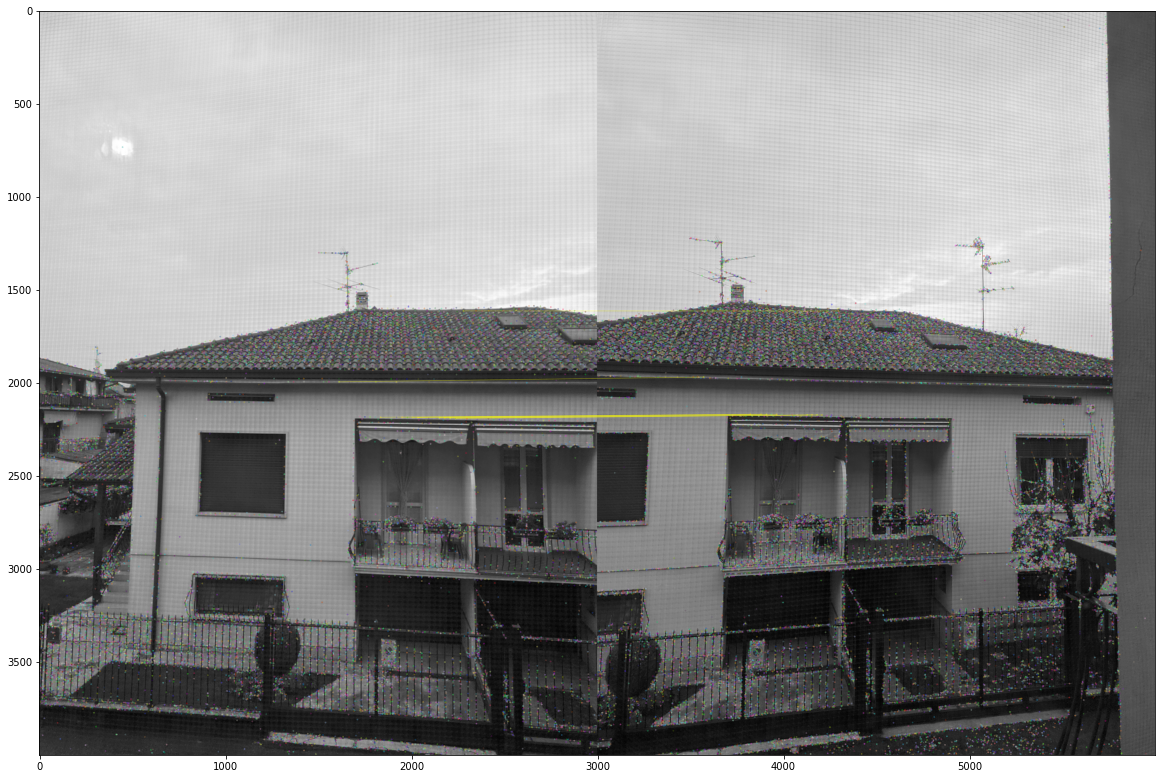

In [22]:
# We represent the best matches identified between the keypoints present in the two photos
# It was more difficult with these two photos than the example given in the classroom. The matching seems to be concentrated at the top of the balcony
matches = sorted(matches, key = lambda x:x.distance)
res = cv.drawMatches(prova1, kps1, prova2, kps2, matches[:10], None, matchColor = [255,255,0])
plt.figure(figsize=(20,15))
plt.imshow(res)

In [23]:
# 16977 keypoints identified in image 1
len(kps1)

16977

In [24]:
# 28581 keypoints identified in image 2
len(kps2)

28581

In [25]:
# The resulting matrix was found
H = myHomography(kps1, kps2, matches)
H

array([[ 6.48159792e-01, -9.51669786e-03,  1.09390833e+03],
       [-2.38375319e-01,  8.47573337e-01,  2.99353562e+02],
       [-1.10833873e-04, -8.98703870e-06,  1.00000000e+00]])

In [26]:
# Apply myWarp function
temp = myWarp(prova2, H, 4755, 4710)

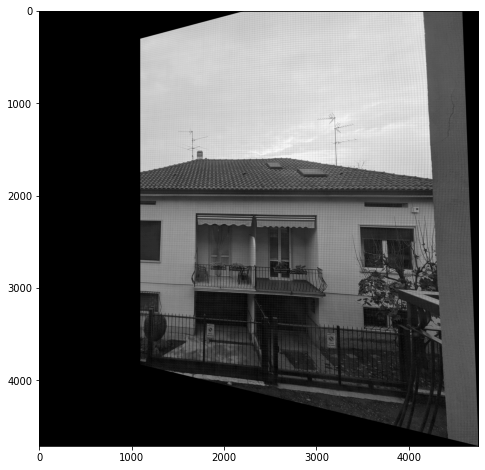

In [27]:
# Plot the result of remapping image 2
plt.figure(figsize=(15,8))
plt.imshow(temp, cmap='gray')

In [28]:
# Apply myCollage function
final = myCollage(prova1, temp)

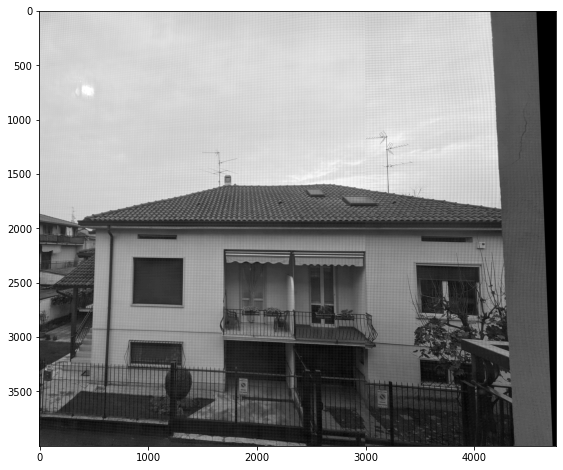

In [29]:
# We conclude by plotting the result
# The final result is good despite the difficulties in matching
plt.figure(figsize=(15,8))
plt.imshow(final, cmap='gray')